In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import mmcv
import importlib
import torch
import torchvision.transforms as transforms
from mmcv import Config
from mmcls.datasets.pipelines import Compose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from PIL import Image
import heapq
from mmseg.apis import inference_segmentor, init_segmentor
from mmseg.core.evaluation import get_palette
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

from scripts import generate_statistics_single
from scripts import visualization_seg_masks
from scripts import transformations
from scripts import generate_statistics
from scripts import generate_segmentation
from scripts import generate_cams
from scripts import utils
from scripts import new_gen_seg
from scripts.ImageDataset import ImageDataset
from scripts.utils import pipeline

In [5]:
configSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/ocrnet_hr48_512x512_carparts_noflip.py'
checkpointSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth'
imgRoot = '../data/CompCars_sv_original_split/train'
configCAM = '../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py'
checkpointCAM = '../CAMModels/resnet/compCars_Original/latest.pth'
annfile = '../annfile.txt'
imgName='Acura_Acura_ILX_2a6cce617fc27d.jpg'
imgPath=os.path.join(imgRoot, imgName)

paletteName='Comp_Original_Ocrnet_Carparts_Noflip'

In [4]:
CAMConfigObj = Config.fromfile(configCAM)
SegConfigObj = Config.fromfile(configSeg)
pipeline = transformations.get_pipeline_from_config_pipeline(CAMConfigObj.data.test.pipeline)
pipelineScale = transformations.get_pipeline_from_config_pipeline(CAMConfigObj.data.test.pipeline, scaleToInt=True)

In [11]:
imgName = 'Acura_Acura_ILX_2a6cce617fc27d.jpg'
imgPath = os.path.join(imgRoot,'Acura_Acura_ILX_2a6cce617fc27d.jpg')
model = init_segmentor(configSeg,checkpointSeg, device='cuda:0')

load checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth


In [6]:

#cam = generate_cams.main([imgPath, configCAM, checkpointCAM, '--device','cuda'])
cam = generate_cams.main([imgPath, configCAM, checkpointCAM])
segMask, segImg, palette = generate_segmentation.main([imgPath, configSeg, checkpointSeg,'--types', 'masks', 'images'])
#loadedCams = np.load('../cams/cams_resnet_compcars_original_train.npz')
#loadedSegmentations = np.load('../segmentations/generated_segmentations.npz')

In [23]:
transformedSegMask = transformations.pipeline_transform(segMask[imgName],pipelineScale)
transformedSegImg = transformations.pipeline_transform(segImg[imgName], pipelineScale)

load checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth
Generate Results for file: ../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg


Results generated:1/1: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Generating CAM for file:../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg
load checkpoint from local path: ../CAMModels/resnet/compCars_Original/latest.pth
Automatically choose the last norm layer as target_layer.


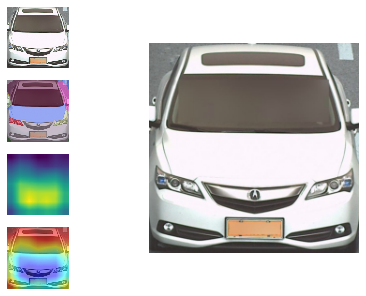

In [15]:
generate_statistics_single.plot(imgName='Acura_Acura_ILX_2a6cce617fc27d.jpg', imgRoot=imgRoot, camConfig=configCAM,
                                camCheckpoint=checkpointCAM, segConfig=configSeg, segCheckpoint=checkpointSeg)

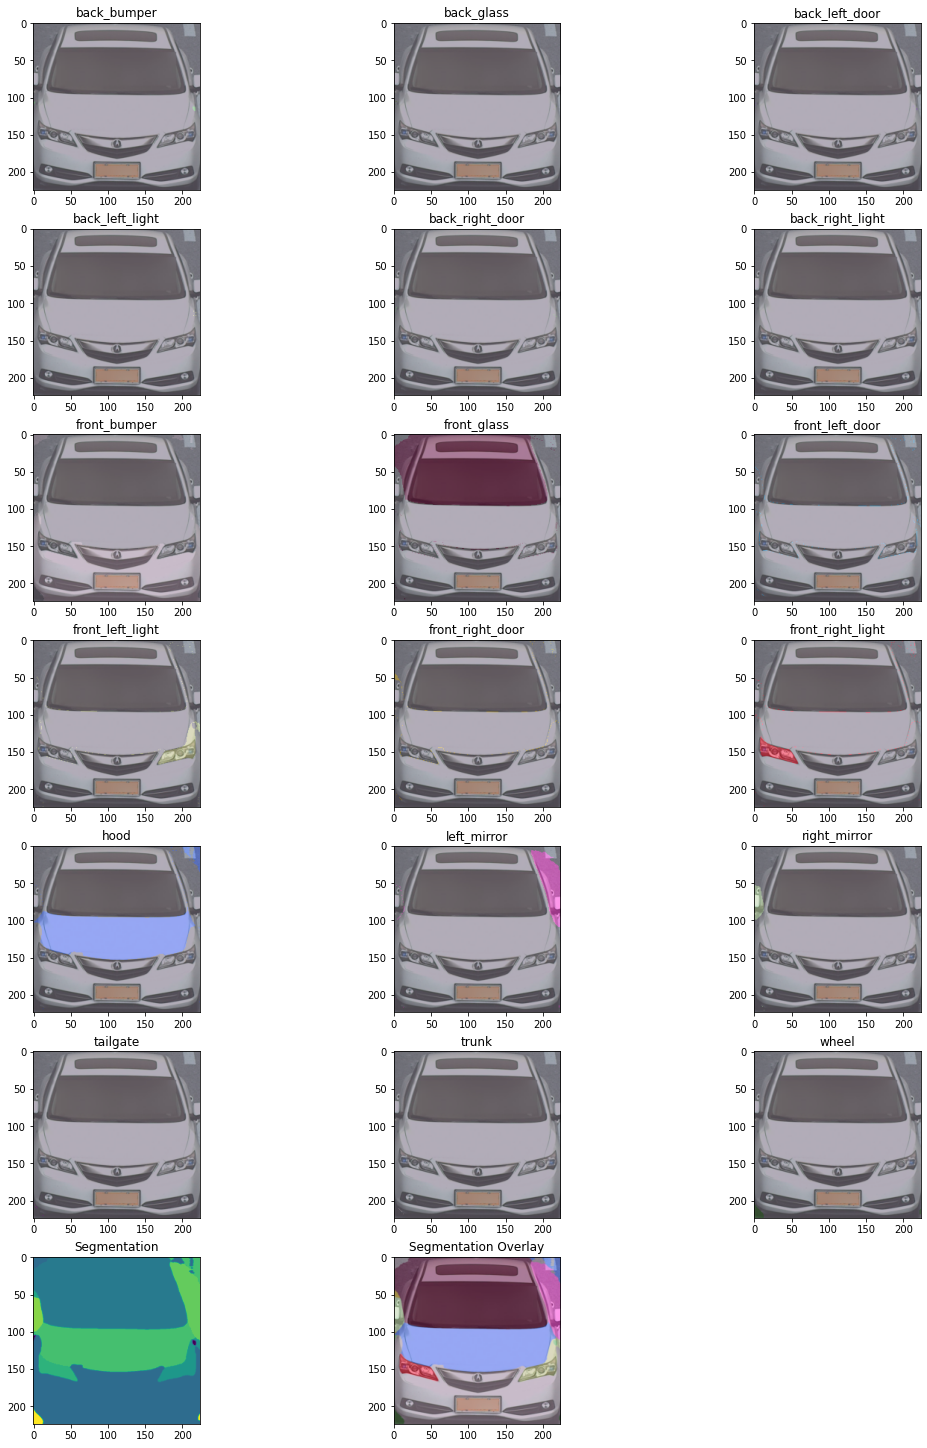

In [16]:
visualization_seg_masks.show_segmentation_Masks_Overlay(classes=model.CLASSES, 
                                             segmentation=transformedSegMask,
                                            imgData=transformations.pipeline_transform(imgPath, pipelineScale),
                                            model=model,palette=palette,
                                            segmentImageOverlay=transformedSegImg)

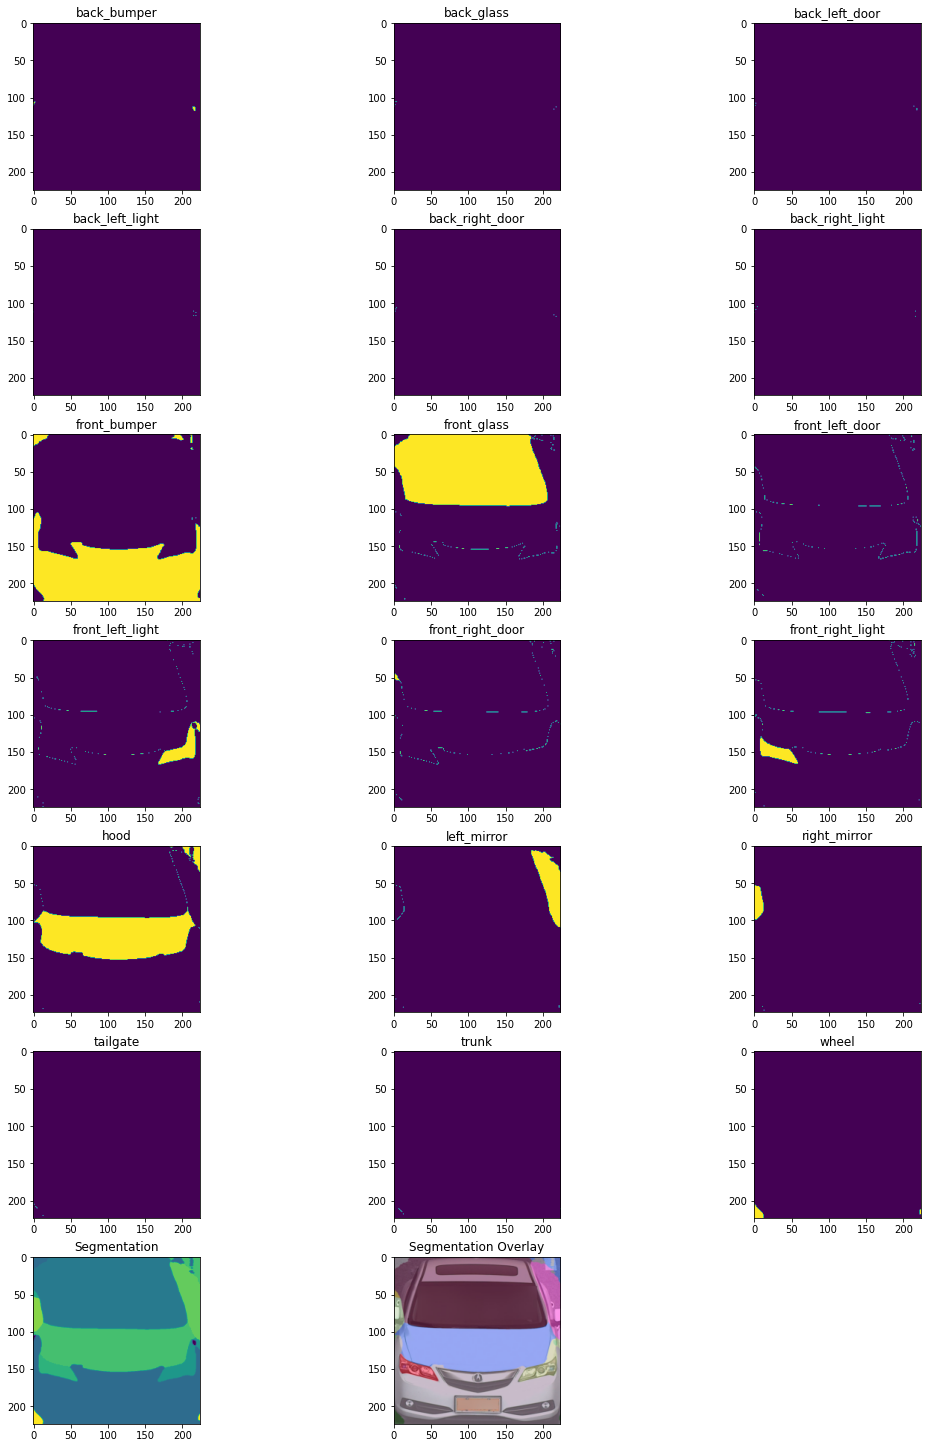

In [17]:
visualization_seg_masks.show_segmentation_Masks(classes=model.CLASSES, 
                                             segmentation=transformedSegMask,
                                            segmentImageOverlay=transformedSegImg)

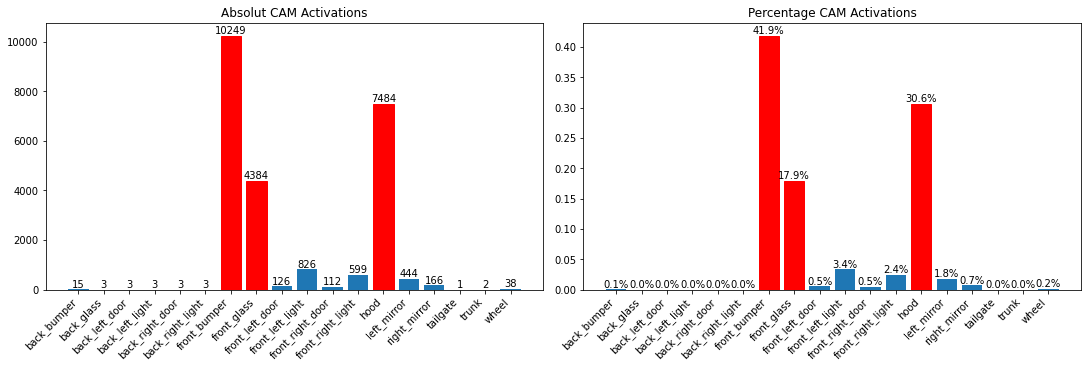

In [18]:
generate_statistics_single.generate_bar_cam_intersection(segmentation=transformedSegMask,camHeatmap=cam[imgName],classes=model.CLASSES)

In [ ]:
"""Showing relative and absolute activations of one image from CompCarsOriginal with OCR No Flip model."""

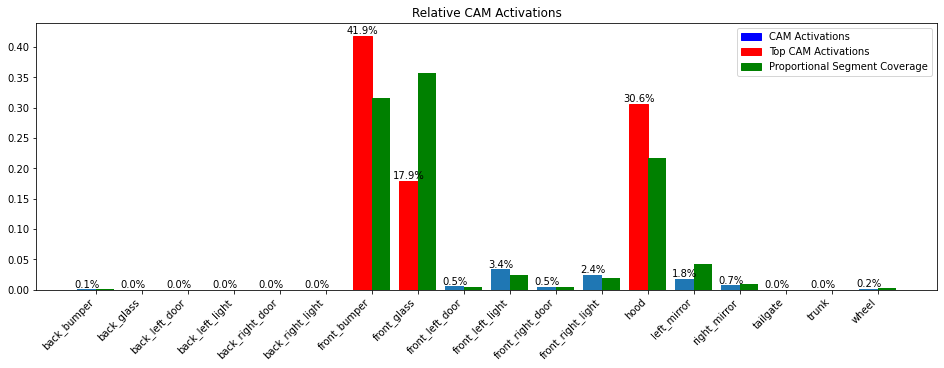

In [19]:
generate_statistics_single.generate_bar_cam_intersection_prop_area(segmentation=transformedSegMask,camHeatmap=cam[imgName],classes=model.CLASSES)

In [ ]:
"""Example showing the relative Activations and the proportional coverage of the segment region relative
to the image area
Only for one image."""

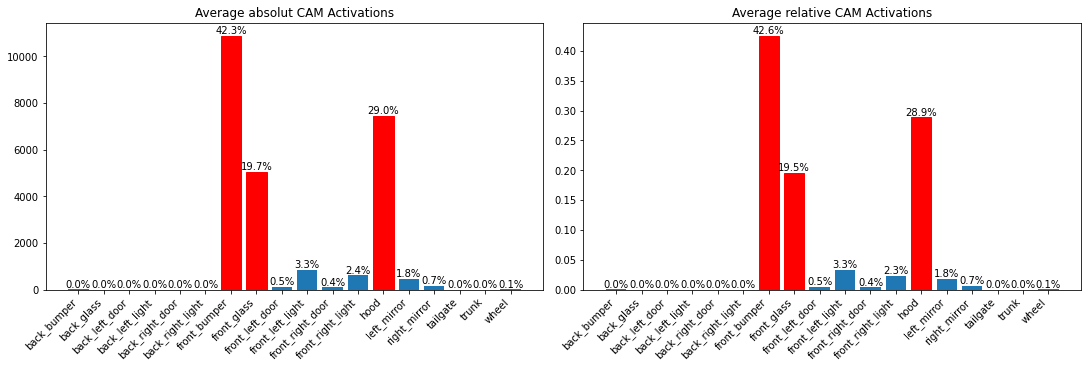

In [48]:
generate_statistics.generate_statistic(x, cams, segmentations, model.CLASSES, pipeline=pipelineScale)

In [ ]:
"""Same as below was more of a test"""

Generating results based on file: ../annfile.txt
Generating CAMs for all files specified by file: ../annfile.txt
load checkpoint from local path: ../CAMModels/resnet/compCars_Original/latest.pth
Automatically choose the last norm layer as target_layer.


CAMs generated:3/3: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
c:\users\linus\desktop\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:225: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth
Generating results based on file: ../annfile.txt


Results generated:3/3: 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]


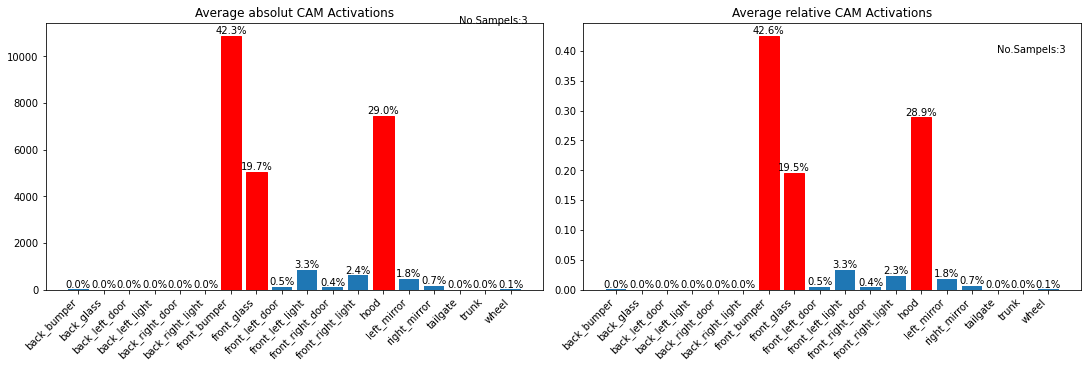

In [137]:
generate_statistics.generate_statistics_infer(imgRoot=imgRoot, classes=model.CLASSES, 
                                              camConfig=configCAM, camCheckpoint=checkpointCAM,
                                              segConfig=configSeg,segCheckpoint=checkpointSeg,annfile=annfile,
                                              pipeline=pipelineScale)

In [ ]:
"""Same as below was more of a test"""

Generating results based on file: ../annfile.txt matching any of class: Acura_Acura_ILX


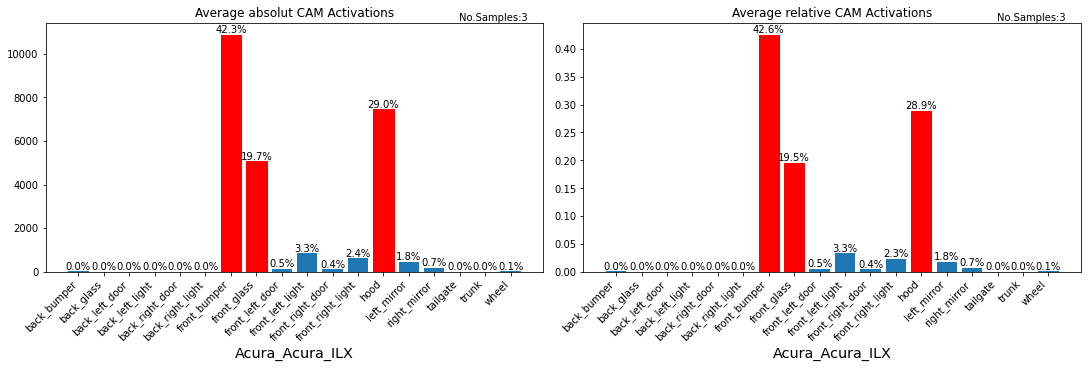

In [139]:
generate_statistics.generate_statistics_infer(imgRoot=imgRoot, classes=model.CLASSES, 
                                              cams=cams,
                                              segmentations=segmentations,
                                              annfile=annfile,pipeline=pipelineScale, genClasses='Acura_Acura_ILX')

In [ ]:
"""Graph showing absolute and relative CAM Activations for all samples in data/train for CompCarsOriginal 
that belong to the Class Acura_Acura_ILX and match the Annfile (only 3 samples) with OCR NoFlip model"""

Generating results for all files in folder: ../data/CompCars_sv_original_split/train matching any of class Acura_Acura_ILX


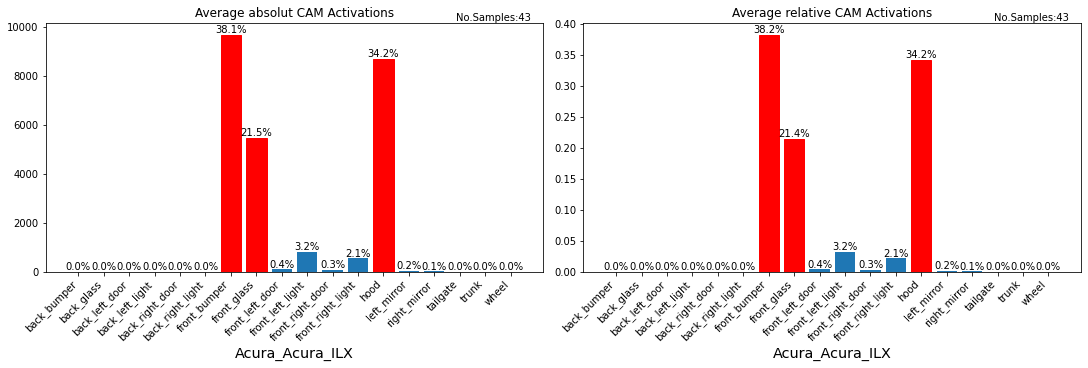

In [134]:
with np.load('../cams/cams_resnet_compcars_original_train_cpu.npz') as cams, np.load('../segmentations/segCompOrgCarpartsNoflip.npz') as segmentations:
    generate_statistics.generate_statistics_infer(imgRoot=imgRoot, classes=model.CLASSES, 
                                              cams=cams,
                                              segmentations=segmentations,
                                              pipeline=pipelineScale, genClasses='Acura_Acura_ILX')

In [ ]:
"""Graph showing absolute and relative CAM Activations for all samples in data/train for CompCarsOriginal 
that belong to the Class Acura_Acura_ILX with OCR NoFlip model"""

Generating results for all files in folder: ../data/CompCars_sv_original_split/train


C:\Users\Linus\Desktop\XAI-Vehicle-Classification\scripts\generate_statistics.py:102: UserWarning: Statistics computed over 31148 items. Reverting to using batches of size 10000 to avoid overflows. Can be overriden by using forceAll=True
  warnings.warn(f'Statistics computed over {numSamples} items. Reverting to using batches of size {accumulateLimit} '


Generating data for Batch 1
Generating data for Batch 2
Generating data for Batch 3
Generating data for Batch 4
Data generated.
Saving results in: ../statsResults/CompOrgCarpartsNoFlipFull.jpg
Saving figure in: ../statsResults/CompOrgCarpartsNoFlipFull.jpg
Output path is not a directory. Using base directory: ../statsResults.
Saving images to: ../statsResults/CompOrgCarpartsNoFlipFull.jpg


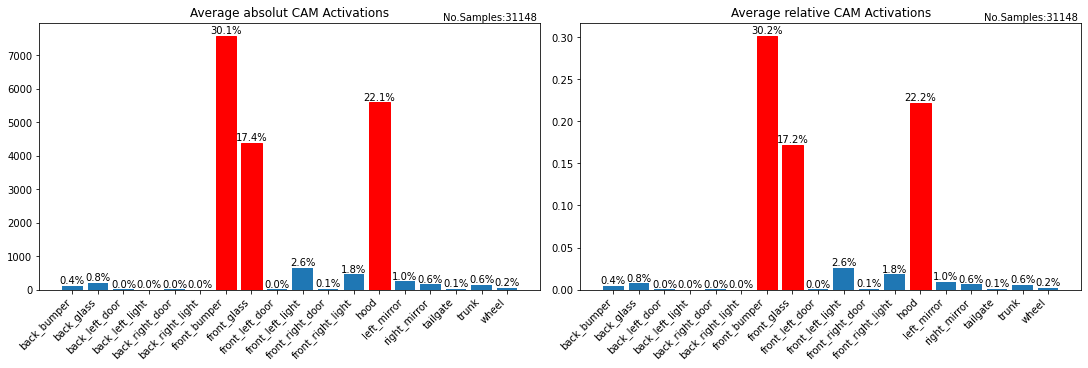

In [18]:
with np.load('../cams/cams_resnet_compcars_original_train_cpu.npz') as cams, np.load('../segmentations/segCompOrgCarpartsNoflip.npz') as segmentations:
    generate_statistics.generate_statistics_infer(imgRoot=imgRoot, classes=model.CLASSES, 
                                              cams=cams,segmentations=segmentations, saveResults='../statsResults/CompOrgCarpartsNoFlipFull.jpg')

In [ ]:
"""Graph showing absolute and relative CAM Activations for all samples in data/train for CompCarsOriginal with OCR NoFlip model"""

In [163]:
with np.load('../segmentations/segCompOrgCarpartsNoflip.npz') as t:
    s = [x for x in t.files if x.startswith('Honda_Accord')]
    f = t['Honda_Accord_599a9edc09b323.jpg']

In [33]:
cam = generate_cams.main([imgPath, configCAM, checkpointCAM])

Generate Results for file: ../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg
Generate Results for specified files
load checkpoint from local path: ../CAMModels/resnet/compCars_Original/latest.pth
Automatically choose the last norm layer as target_layer.


CAMs generated:1/1: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


In [34]:
cam = generate_cams.main([imgRoot, configCAM, checkpointCAM, '--ann-file', annfile])

Generate Results for specified files
load checkpoint from local path: ../CAMModels/resnet/compCars_Original/latest.pth
Automatically choose the last norm layer as target_layer.


CAMs generated:3/3: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]


In [40]:
cam = generate_cams.main([imgRoot, configCAM, checkpointCAM, '--classes', 'Acura_Acura_ILX'])

Generate Results for specified files
load checkpoint from local path: ../CAMModels/resnet/compCars_Original/latest.pth
Automatically choose the last norm layer as target_layer.


CAMs generated:43/43: 100%|██████████| 43/43 [00:12<00:00,  3.44it/s]


In [41]:
cam

{'Acura_Acura_ILX_0502a4c6c6099c.jpg': array([[0.        , 0.        , 0.        , ..., 0.01690197, 0.01690197,
         0.01690197],
        [0.        , 0.        , 0.        , ..., 0.01690197, 0.01690197,
         0.01690197],
        [0.        , 0.        , 0.        , ..., 0.01690197, 0.01690197,
         0.01690197],
        ...,
        [0.29559046, 0.29559046, 0.29559046, ..., 0.08443322, 0.08443322,
         0.08443322],
        [0.29559046, 0.29559046, 0.29559046, ..., 0.08443322, 0.08443322,
         0.08443322],
        [0.29559046, 0.29559046, 0.29559046, ..., 0.08443322, 0.08443322,
         0.08443322]], dtype=float32),
 'Acura_Acura_ILX_1673ba71a400e8.jpg': array([[0.        , 0.        , 0.        , ..., 0.09615138, 0.09615138,
         0.09615138],
        [0.        , 0.        , 0.        , ..., 0.09615138, 0.09615138,
         0.09615138],
        [0.        , 0.        , 0.        , ..., 0.09615138, 0.09615138,
         0.09615138],
        ...,
        [0.196041

In [42]:
cam['Acura_Acura_ILX_2a6cce617fc27d.jpg']

array([[0.00775776, 0.00775776, 0.00775776, ..., 0.06024631, 0.06024631,
        0.06024631],
       [0.00775776, 0.00775776, 0.00775776, ..., 0.06024631, 0.06024631,
        0.06024631],
       [0.00775776, 0.00775776, 0.00775776, ..., 0.06024631, 0.06024631,
        0.06024631],
       ...,
       [0.20393308, 0.20393308, 0.20393308, ..., 0.39235473, 0.39235473,
        0.39235473],
       [0.20393308, 0.20393308, 0.20393308, ..., 0.39235473, 0.39235473,
        0.39235473],
       [0.20393308, 0.20393308, 0.20393308, ..., 0.39235473, 0.39235473,
        0.39235473]], dtype=float32)

In [31]:
with np.load('../cams/cams_resnet_compcars_original_train_cpu.npz') as t:
    plt.imshow(t['Acura_Acura_ILX_2a6cce617fc27d.jpg'])

[[0.00775776 0.00775776 0.00775776 ... 0.06024631 0.06024631 0.06024631]
 [0.00775776 0.00775776 0.00775776 ... 0.06024631 0.06024631 0.06024631]
 [0.00775776 0.00775776 0.00775776 ... 0.06024631 0.06024631 0.06024631]
 ...
 [0.20393308 0.20393308 0.20393308 ... 0.39235473 0.39235473 0.39235473]
 [0.20393308 0.20393308 0.20393308 ... 0.39235473 0.39235473 0.39235473]
 [0.20393308 0.20393308 0.20393308 ... 0.39235473 0.39235473 0.39235473]]


In [11]:
model.cfg.data.test

{'type': 'CarPartsDataset',
 'data_root': 'data/Car-Parts-Segmentation',
 'reduce_zero_label': True,
 'img_dir': 'images/test',
 'ann_dir': 'annotations/test',
 'pipeline': [{'type': 'LoadImageFromFile'},
  {'type': 'MultiScaleFlipAug',
   'img_scale': (2048, 512),
   'flip': False,
   'transforms': [{'type': 'Resize', 'keep_ratio': True},
    {'type': 'RandomFlip'},
    {'type': 'Normalize',
     'mean': [123.675, 116.28, 103.53],
     'std': [58.395, 57.12, 57.375],
     'to_rgb': True},
    {'type': 'ImageToTensor', 'keys': ['img']},
    {'type': 'Collect', 'keys': ['img']}]}]}

In [22]:
r = new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '-s'])

Saving resulting masks in ./output/
Calculating results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7565/7565, 7.0 task/s, elapsed: 1083s, ETA:     0s
Saving results for batch 0 at ./output/results0.npz


In [12]:
r = new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '--ann-file', annfile, '-s', '-c', 'Acura_Acura_ILX'])

Saving resulting masks in ./output/
Calculating results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.7 task/s, elapsed: 4s, ETA:     0s
Saving results for batch 0 at ./output/results0.npz


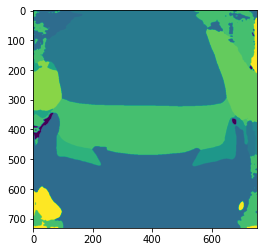

In [9]:
plt.imshow(r[0])

In [9]:
CAMConfigObj.data.test

{'type': 'CompCars',
 'data_prefix': 'data/CompCars_sv_original_split/val',
 'ann_file': 'data/CompCars_sv_original_split/meta/val.txt',
 'pipeline': [{'type': 'LoadImageFromFile'},
  {'type': 'Resize', 'size': (256, -1)},
  {'type': 'CenterCrop', 'crop_size': 224},
  {'type': 'Normalize',
   'mean': [123.675, 116.28, 103.53],
   'std': [58.395, 57.12, 57.375],
   'to_rgb': True},
  {'type': 'ImageToTensor', 'keys': ['img']},
  {'type': 'Collect', 'keys': ['img']}]}

In [14]:
with np.load('output/results0.npz', allow_pickle=True) as f, open('output/split0.txt') as t:
    for ky in t.readlines():
        print(ky)
        print(f[ky.strip()])

Acura_Acura_ILX_0502a4c6c6099c.jpg

[[ 7  7  7 ... 17 17 17]
 [ 7  7  7 ... 17 17 17]
 [ 7  7  7 ... 17 17 17]
 ...
 [ 6  6  6 ... 17 17 17]
 [ 6  6  6 ... 17 17 17]
 [ 6  6  6 ... 17 17 17]]
Acura_Acura_ILX_1673ba71a400e8.jpg

[[ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_ILX_2403b77edd6673.jpg

[[12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_ILX_2a6cce617fc27d.jpg

[[ 6  6  6 ...  6  6  6]
 [ 6  6  6 ...  6  6  6]
 [ 6  6  6 ...  6  6  6]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_ILX_2ab9890f11d6ac.jpg

[[ 6  6  6 ...  7  7  7]
 [ 6  6  6 ...  7  7  7]
 [ 6  6  6 ...  7  7  7]
 ...
 [ 6  6  6 ... 17 17 17]
 [ 6  6  6 ... 17 17 17]
 [ 6  6  6 ... 17 17 17]]
Acura_Acura_ILX_2f4690e79f0960.jpg

[[ 6

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]]
Acura_Acura_MDX_686406f261cdbd.jpg

[[16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 ...
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]]
Acura_Acura_MDX_6bc4c634f99d5f.jpg

[[ 7  7  7 ... 12 12 12]
 [ 7  7  7 ... 12 12 12]
 [ 7  7  7 ... 12 12 12]
 ...
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]]
Acura_Acura_MDX_6c65fb4d7b2f89.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]]
Acura_Acura_MDX_72cdd549420f8b.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]]
Acura_Acura_MDX_753178dcb4cf34.jpg

[[12 12 12 ... 10 10 10]
 [12 12 12 ... 

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]]
Acura_Acura_RDX_33c08addf3dd94.jpg

[[16 16 16 ...  0  0  0]
 [16 16 16 ...  0  0  0]
 [16 16 16 ...  0  0  0]
 ...
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]]
Acura_Acura_RDX_34ad2c4ce8c4b9.jpg

[[ 7  7  7 ...  6  6  6]
 [ 7  7  7 ...  6  6  6]
 [ 7  7  7 ...  6  6  6]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_RDX_3f5951a5c2fac2.jpg

[[12 12 12 ... 14 14 14]
 [12 12 12 ... 14 14 14]
 [12 12 12 ... 14 14 14]
 ...
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]]
Acura_Acura_RDX_40b0cda6627db1.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [17 17 17 ...  7  7  7]
 [17 17 17 ...  7  7  7]
 [17 17 17 ...  7  7  7]]
Acura_Acura_RDX_41a5c24b81a3aa.jpg

[[ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 

[[ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_RDX_e75a4dbf2e14ae.jpg

[[ 7  7  7 ... 13 13 13]
 [ 7  7  7 ... 13 13 13]
 [ 7  7  7 ... 13 13 13]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_RDX_ecce42057083f2.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [ 6  6  6 ...  6  6  6]
 [ 6  6  6 ...  6  6  6]
 [ 6  6  6 ...  6  6  6]]
Acura_Acura_RDX_eec945a53e86d1.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [ 1  1  1 ...  6  6  6]
 [ 1  1  1 ...  6  6  6]
 [ 1  1  1 ...  6  6  6]]
Acura_Acura_RDX_f64327c9e42b1a.jpg

[[ 6  6  6 ...  6  6  6]
 [ 6  6  6 ...  6  6  6]
 [ 6  6  6 ...  6  6  6]
 ...
 [ 7  7  7 ... 17 17 17]
 [ 7  7  7 ... 17 17 17]
 [ 7  7  7 ... 17 17 17]]
Acura_Acura_RDX_fa307cd5f018d4.jpg

[[ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 

[[ 6  6  6 ... 14 14 14]
 [ 6  6  6 ... 14 14 14]
 [ 6  6  6 ... 14 14 14]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_TL_08a783e88f6967.jpg

[[ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 ...
 [17 17 17 ... 12 12 12]
 [17 17 17 ... 12 12 12]
 [17 17 17 ... 12 12 12]]
Acura_Acura_TL_09a2bf7254b8e7.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]]
Acura_Acura_TL_0d599d4a49b62d.jpg

[[12 12 12 ...  0  0  0]
 [12 12 12 ...  0  0  0]
 [12 12 12 ...  0  0  0]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_TL_0f356efaa72859.jpg

[[ 1  1  1 ... 17 17 17]
 [ 1  1  1 ... 17 17 17]
 [ 1  1  1 ... 17 17 17]
 ...
 [17 17 17 ... 16 16 16]
 [17 17 17 ... 16 17 17]
 [17 17 17 ... 16 17 17]]
Acura_Acura_TL_0ffccd047d37a8.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12

[[ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_TL_7d36c136c9e8cb.jpg

[[12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_TL_7edb411c697d71.jpg

[[ 6  6  6 ...  7  7  7]
 [ 6  6  6 ...  7  7  7]
 [ 6  6  6 ...  7  7  7]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_TL_80ab517cba08a0.jpg

[[ 7  7  7 ... 12 12 12]
 [ 7  7  7 ... 12 12 12]
 [ 7  7  7 ... 12 12 12]
 ...
 [ 0  0  0 ...  6  6  6]
 [ 0  0  0 ...  6  6  6]
 [ 0  0  0 ...  6  6  6]]
Acura_Acura_TL_84bdf20851e2ad.jpg

[[12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_TL_84c02e64a5e798.jpg

[[12 12 12 ...  0  0  0]
 [12 12 12 ...  0  0

[[12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_TL_e6bab50d89b64c.jpg

[[ 6  6  6 ... 17 17 17]
 [ 6  6  6 ... 17 17 17]
 [ 6  6  6 ... 17 17 17]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_TL_e71929da1feb62.jpg

[[ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 [ 6  6  6 ... 12 12 12]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_TL_e73164b80a9588.jpg

[[ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_TL_eb5a5e24a26b6a.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]
 [17 17 17 ...  6  6  6]]
Acura_Acura_TL_ee08471ab14ae2.jpg

[[17 17 17 ... 13 13 13]
 [17 17 17 ... 13 13

[[17 17 17 ... 12 12 12]
 [17 17 17 ... 12 12 12]
 [17 17 17 ... 12 12 12]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_ZDX_bef4078f0655b6.jpg

[[12 12 12 ...  9  9  9]
 [12 12 12 ...  9  9  9]
 [12 12 12 ...  9  9  9]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_ZDX_c0029637b9b13c.jpg

[[12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 [12 12 12 ...  7  7  7]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_ZDX_c533714994264f.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_ZDX_ca8048fd025fb3.jpg

[[12 12 12 ...  0  0  0]
 [12 12 12 ...  0  0  0]
 [12 12 12 ...  0  0  0]
 ...
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]
 [17 17 17 ... 17 17 17]]
Acura_Acura_ZDX_d1acb22aff31fb.jpg

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 

In [6]:
CAMConfigObj.data

{'samples_per_gpu': 128,
 'workers_per_gpu': 8,
 'train': {'type': 'CompCars',
  'data_prefix': 'data/CompCars_sv_original_split/train',
  'ann_file': 'data/CompCars_sv_original_split/meta/train.txt',
  'pipeline': [{'type': 'LoadImageFromFile'},
   {'type': 'RandomResizedCrop', 'size': 224},
   {'type': 'RandomFlip', 'flip_prob': 0.5, 'direction': 'horizontal'},
   {'type': 'Normalize',
    'mean': [123.675, 116.28, 103.53],
    'std': [58.395, 57.12, 57.375],
    'to_rgb': True},
   {'type': 'ImageToTensor', 'keys': ['img']},
   {'type': 'ToTensor', 'keys': ['gt_label']},
   {'type': 'Collect', 'keys': ['img', 'gt_label']}]},
 'val': {'type': 'CompCars',
  'data_prefix': 'data/CompCars_sv_original_split/val',
  'ann_file': 'data/CompCars_sv_original_split/meta/val.txt',
  'pipeline': [{'type': 'LoadImageFromFile'},
   {'type': 'Resize', 'size': (256, -1)},
   {'type': 'CenterCrop', 'crop_size': 224},
   {'type': 'Normalize',
    'mean': [123.675, 116.28, 103.53],
    'std': [58.395, 

In [20]:
r = new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '--ann-file', annfile, '--types', 'images','masks' , '-s', 'raw.npz'])

Saving resulting masks in ./output/
Saving result images in ./output/images
Calculating results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.7 task/s, elapsed: 4s, ETA:     0s
Saving results for batch 0 at ./output/raw0.npz


In [20]:
s = new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '--ann-file', annfile,
                      '-s','pipe4.npz', '-p', 'post',configCAM])

Saving resulting masks in ./output/
Loading Pipeline from Config ../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py
Compose(
    Lambda()
    Resize(size=(256,), interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    Lambda()
)
Calculating results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.7 task/s, elapsed: 4s, ETA:     0s
Saving results for batch 0 at ./output/pipe40.npz


In [8]:
new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '--ann-file', annfile, '-t', 'images',
                      '-s','pipe4.npz', '-p', 'post',configCAM])

Saving result images in ./output/images
load checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth
load checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth
Loading Pipeline from Config ../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py
Calculating results for batch 0
[                                                  ] 0/3, elapsed: 0s, ETA:{'img_metas': [DataContainer([[{'filename': './../data/CompCars_sv_original_split/train\\Acura_Acura_ILX_2a6cce617fc27d.jpg', 'ori_filename': 'Acura_Acura_ILX_2a6cce617fc27d.jpg', 'ori_shape': (731, 752, 3), 'img_shape': (512, 527, 3), 'pad_shape': (512, 527, 3), 'scale_factor': array([0.70079786, 0.7004104 , 0.70079786, 0.7004104 ], dtype=float32), 'flip': False, 'flip_direction': 'horizontal', 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True}}]])],

In [8]:
new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '-s','postTransed.npz', '-p', 'post',configCAM, '-c', 'A', 'B'])

Saving resulting masks in ./output/
load checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth
load checkpoint from local path: ../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth
Loading Pipeline from Config ../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py
Calculating results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4795/4795, 6.0 task/s, elapsed: 799s, ETA:     0s
Saving results for batch 0 at ./output/postTransed0.npz


In [22]:
new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '-s','postTransed.npz', '-p', 'post',configCAM, '-c', 'A', 'B','C','D','E'])

Saving resulting masks in ./output/
Loading Pipeline from Config ../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py
Calculating results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5000/5000, 5.9 task/s, elapsed: 850s, ETA:     0s
Saving results for batch 0 at ./output/postTransed0.npz
Calculating results for batch 1
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2565/2565, 5.7 task/s, elapsed: 454s, ETA:     0s
Saving results for batch 1 at ./output/postTransed1.npz


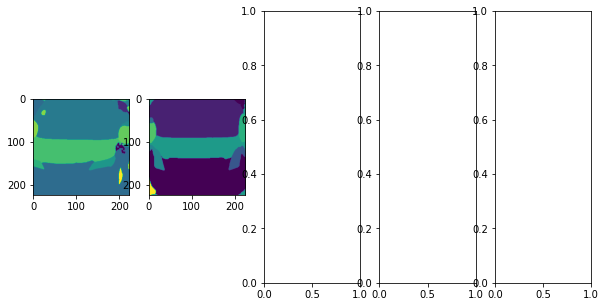

In [27]:
with np.load('output/postTransed0.npz') as r, np.load('output/postTransed1.npz') as p, np.load('output/pipe40.npz') as p4, np.load('output/pipe20.npz') as p2, np.load('output/pipe30.npz') as p3, open('output/split0.txt') as t:
    lines = [line.strip() for line in t]
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(r[r.files[0]])
    ax[1].imshow(p[p.files[0]])

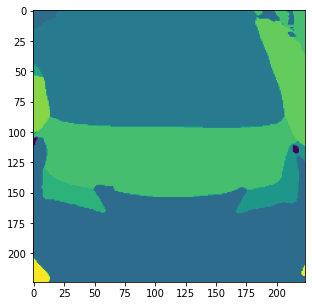

In [13]:
with np.load('output/pipe40.npz') as p4, open('output/split0.txt') as t:
    lines = [line.strip() for line in t]
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.imshow(p4[p4.files[0]])
    a = p4[p4.files[0]]

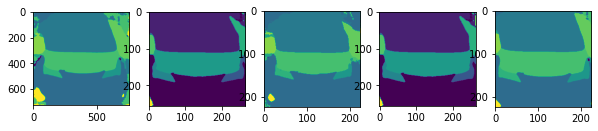

In [21]:
with np.load('output/raw0.npz') as r, np.load('output/pipe0.npz') as p, np.load('output/pipe40.npz') as p4, np.load('output/pipe20.npz') as p2, np.load('output/pipe30.npz') as p3, open('output/split0.txt') as t:
    lines = [line.strip() for line in t]
    fig, ax = plt.subplots(1,5, figsize=(10,5))
    ax[0].imshow(r[lines[0]])
    ax[1].imshow(p[lines[0]])
    ax[2].imshow(p2[lines[0]])
    ax[3].imshow(p3[lines[0]])
    ax[4].imshow(p4[lines[0]])

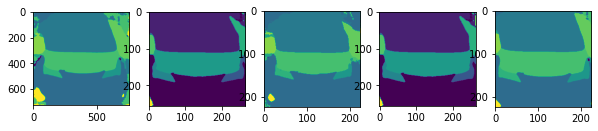

In [18]:
with np.load('output/raw0.npz') as r, np.load('output/pipe0.npz') as p, np.load('output/pipe40.npz') as p4, np.load('output/pipe20.npz') as p2, np.load('output/pipe30.npz') as p3, open('output/split0.txt') as t:
    lines = [line.strip() for line in t]
    fig, ax = plt.subplots(1,5, figsize=(10,5))
    ax[0].imshow(r[lines[0]])
    ax[1].imshow(p[lines[0]])
    ax[2].imshow(p2[lines[0]])
    ax[3].imshow(p3[lines[0]])
    ax[4].imshow(p4[lines[0]])

In [6]:
from mmseg.datasets.pipelines import Compose
from mmseg.datasets.pipelines.customLoading import LoadImageFromArray
pip = Compose([LoadImageFromArray(), {'type': 'ResizeCls', 'size': (256, -1)}, {'type': 'CenterCropCls', 'crop_size': 224}])
with np.load('output/pipe30.npz') as p3, open('output/split0.txt') as t:
    lines = [line.strip() for line in t]
    a = p3[lines[0]]

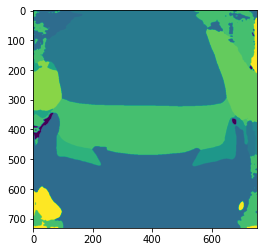

In [78]:
plt.imshow(a)

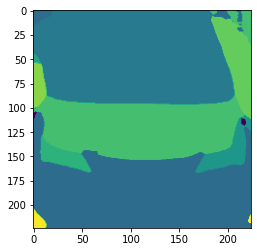

In [79]:
plt.imshow(pip(a))

In [12]:
model.CLASSES

('back_bumper',
 'back_glass',
 'back_left_door',
 'back_left_light',
 'back_right_door',
 'back_right_light',
 'front_bumper',
 'front_glass',
 'front_left_door',
 'front_left_light',
 'front_right_door',
 'front_right_light',
 'hood',
 'left_mirror',
 'right_mirror',
 'tailgate',
 'trunk',
 'wheel')

In [14]:
a

array([[ 6.,  6.,  6., ..., 12., 12., 12.],
       [ 6.,  6.,  6., ..., 12., 12., 12.],
       [ 6.,  6.,  6., ..., 12., 12., 12.],
       ...,
       [17., 17., 17., ...,  6.,  6.,  6.],
       [17., 17., 17., ...,  6.,  6.,  6.],
       [17., 17., 17., ...,  6.,  6.,  6.]])

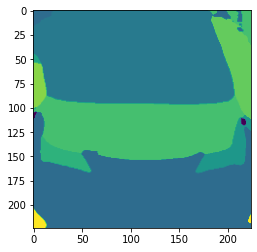

In [15]:
plt.imshow(a)

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import mmcv
import importlib
import torch
import torchvision.transforms as transforms
from mmcv import Config
from mmcls.datasets.pipelines import Compose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from PIL import Image
import heapq
from mmseg.apis import inference_segmentor, init_segmentor
from mmseg.core.evaluation import get_palette
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2

import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

from scripts import generate_statistics_single
from scripts import visualization_seg_masks
from scripts import transformations
from scripts import generate_statistics
from scripts import generate_segmentation
from scripts import generate_cams
from scripts import utils
from scripts import new_gen_seg
from scripts.ImageDataset import ImageDataset
from scripts.utils import pipeline

configSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/ocrnet_hr48_512x512_carparts_noflip.py'
checkpointSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth'
imgRoot = '../data/CompCars_sv_original_split/train'
configCAM = '../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py'
checkpointCAM = '../CAMModels/resnet/compCars_Original/latest.pth'
annfile = '../annfile.txt'
imgName='Acura_Acura_ILX_2a6cce617fc27d.jpg'
imgPath=os.path.join(imgRoot, imgName)

paletteName='Comp_Original_Ocrnet_Carparts_Noflip'

In [3]:
new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '-s','thresh70.npz', 
                  '-p', 'post',configCAM, '--ann-file', annfile, '-t', 'images'])

Saving result images in ./output/images
Loading Pipeline from Config ../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py
Calculating results for batch 0
[                                                  ] 0/3, elapsed: 0s, ETA:img_metas img
()
{}


TypeError: BaseSegmentor.forward() missing 2 required positional arguments: 'img' and 'img_metas'

In [2]:
new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '-s','thresh70.npz', 
                  '-p', 'pre',configCAM, '--ann-file', annfile, '-t', 'images'])

Saving result images in ./output/images
Loading Pipeline from Config ../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py
Adding Pipeline steps into preprocessing.
Calculating results for batch 0


TypeError: GenerationDataset: MultiScaleFlipAug: Resize: Resize.__init__() got an unexpected keyword argument 'size'

In [7]:
new_gen_seg.main([imgRoot, configSeg, checkpointSeg, '-s','thresh70.npz', 
                  '-p', 'pre','Resize224', '--ann-file', annfile, '-t', 'images', '--threshold','0.9'])

Saving result images in ./output/images
Using predefined pipeline: Resize224
Adding Pipeline steps into preprocessing.
Calculating results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3/3, 0.7 task/s, elapsed: 4s, ETA:     0s
Saving results for batch 0 at ./output/thresh70_0.npz
